In [2]:
## basic tutorial on getting pearson correlation of two variables + p-value
## tutorial url:
## https://towardsdatascience.com/python-statistics-for-beginners-pearson-correlation-coefficient-69c9b1ef17f7

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [23]:
col = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", 
           "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", 
           "curb-weight", "engine-type", "num-of-cylinders", "engine-size","fuel-system", "bore", 
           "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

df = pd.read_csv("../Datasets/imports-85.csv", names=col)
print(df.shape)
df.head(5)

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [24]:
df = df.replace('?',np.NaN)
df["price"] = df["price"].astype("float")
df.dropna(inplace=True)

df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


(0.0, 37129.878961930845)

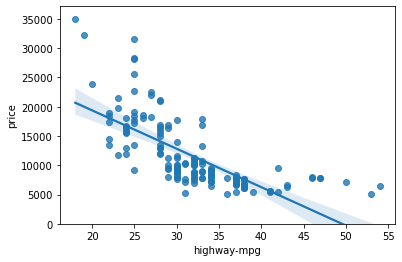

In [25]:
# Create a plot for highway-mpg and price
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [26]:
# Using pandas corr() function
corr = df.corr()
corr

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
symboling,1.000000,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.138316,0.089550,0.149830,-0.162794
wheel-base,-0.520591,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.291431,-0.580657,-0.611750,0.734419
length,-0.336257,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.184814,-0.724544,-0.724599,0.760952
width,-0.219186,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.258752,-0.666684,-0.693339,0.843371
height,-0.475185,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.233308,-0.199737,-0.226136,0.244836
curb-weight,-0.251880,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.224724,-0.762155,-0.789338,0.893639
engine-size,-0.109453,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.141097,-0.699139,-0.714095,0.841496
compression-ratio,-0.138316,0.291431,0.184814,0.258752,0.233308,0.224724,0.141097,1.000000,0.278332,0.221483,0.209361
city-mpg,0.089550,-0.580657,-0.724544,-0.666684,-0.199737,-0.762155,-0.699139,0.278332,1.000000,0.971999,-0.692273
highway-mpg,0.149830,-0.611750,-0.724599,-0.693339,-0.226136,-0.789338,-0.714095,0.221483,0.971999,1.000000,-0.720090


<AxesSubplot:>

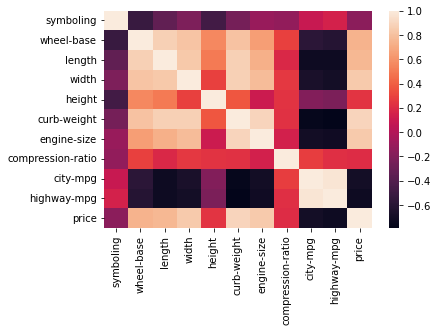

In [27]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [28]:
# Calculate pearson coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7344189369206998  with a P-value of P = 3.2219182542199537e-28


In [29]:
# Calculate pearson coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.7200900979318614  with a P-value of P = 1.0595308379349072e-26
